In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from nltk.corpus import PlaintextCorpusReader

In [2]:
# data를 corpus화
corpus_root = 'C://Users/cse_223/c_data_3000'
QACorpus = nltk.corpus.PlaintextCorpusReader(corpus_root, ".*\.txt", encoding="utf_8")

In [3]:
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['file_1.txt',
 'file_10.txt',
 'file_100.txt',
 'file_1000.txt',
 'file_1001.txt',
 'file_1002.txt',
 'file_1003.txt',
 'file_1004.txt',
 'file_1005.txt',
 'file_1006.txt',
 'file_1007.txt',
 'file_1008.txt',
 'file_1009.txt',
 'file_101.txt',
 'file_1010.txt',
 'file_1011.txt',
 'file_1012.txt',
 'file_1013.txt',
 'file_1014.txt',
 'file_1015.txt',
 'file_1016.txt',
 'file_1017.txt',
 'file_1018.txt',
 'file_1019.txt',
 'file_102.txt',
 'file_1020.txt',
 'file_1021.txt',
 'file_1022.txt',
 'file_1023.txt',
 'file_1024.txt',
 'file_1025.txt',
 'file_1026.txt',
 'file_1027.txt',
 'file_1028.txt',
 'file_1029.txt',
 'file_103.txt',
 'file_1030.txt',
 'file_1031.txt',
 'file_1032.txt',
 'file_1033.txt',
 'file_1034.txt',
 'file_1035.txt',
 'file_1036.txt',
 'file_1037.txt',
 'file_1038.txt',
 'file_1039.txt',
 'file_104.txt',
 'file_1040.txt',
 'file_1041.txt',
 'file_1042.txt',
 'file_1043.txt',
 'file_1044.txt',
 'file_1045.txt',
 'file_1046.txt',
 'file_1047.txt',
 'file_1048.txt',
 '

In [4]:
titles = [title[:-4] for title in QACorpus.fileids()]
titles[:10]

['file_1',
 'file_10',
 'file_100',
 'file_1000',
 'file_1001',
 'file_1002',
 'file_1003',
 'file_1004',
 'file_1005',
 'file_1006']

In [5]:
synopses = [QACorpus.raw(title + ".txt") for title in titles]
synopses[:2]

['\ufeffCannot display all the element of my array in C? I\'ve some trouble with my array. Well, I want to sort an array of 5 integer elements. However, when I display them, it displays only the last element and its value is not the one I\'m expecting to have after sorting.\r\nHence, could help me to troubleshoot this problem, please?\r\nAny help would be much appreciated.\r\nYou should not hardcode the size of the array using 5.  Instead, you should use sizeof(dtab)/sizeof(dtab[0]).\r\nInside ordonnerTableau you have taille=5 but you try to fetch tab on these posisions: tab[j] > tab[j+1] without being sure j is less than 5.Convert string to uppercase with "for" cycleI am working on a code in C that, based on a 26-character key input by the user in command line (ex: BCDEFGHIJKLMNOPQRSTUVWXYZA), encrypts a source message (plaintext) to an encrypted message (ciphertext) by replacing each letter of the source with the letter contained in the key at the i position, where i is the position 

In [6]:
# stopwords 단어 제거 하기 위해 nltk download 실행
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
# stopwords by english 이용하기
stopwords = nltk.corpus.stopwords.words('english')

In [8]:
# lemmatize(표제어(Lemma)는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미) 이용하기
# lemmatize : 단어의 형태학적 파싱을 먼저 진행하기 위해
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
# 정규표현식과 Lemmatize를 사용해 필요한 단어만 추출
def tokenize_and_lemmatize(text):
    tokens  = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('^[a-zA-z]+$',token):
            filtered_tokens.append(token)
        if re.search('^[a-zA-z]+[0-9]+$',token):
            filtered_tokens.append(token)
        if re.search('^[0-9]+[a-zA-z]+$',token):
            filtered_tokens.append(token)
    lemmas = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lemmas

# 정규표현식을 사용해 필요한 단어만 추출, Lemmatize를 적용하기 전의 단어
def tokenize_only(text):
    tokens  = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('^[a-zA-z]+$',token):
            filtered_tokens.append(token)
        if re.search('^[a-zA-z]+[0-9]+$',token):
            filtered_tokens.append(token)
        if re.search('^[0-9]+[a-zA-z]+$',token):
            filtered_tokens.append(token)
    return filtered_tokens

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cse_223\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# synopses에 함수 적용해 단어 추출하기
totalvocab_lemmatized = []
totalvocab_tokenized = []
for i in synopses:
    allwords_lemmatized = tokenize_and_lemmatize(i)
    totalvocab_lemmatized.extend(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [12]:
# 결과 - 추출된 단어
print(totalvocab_lemmatized[:20])
print(totalvocab_tokenized[:20])

['can', 'not', 'display', 'all', 'the', 'element', 'of', 'my', 'array', 'in', 'c', 'i', 'some', 'trouble', 'with', 'my', 'array', 'well', 'i', 'want']
['Can', 'not', 'display', 'all', 'the', 'element', 'of', 'my', 'array', 'in', 'C', 'I', 'some', 'trouble', 'with', 'my', 'array', 'Well', 'I', 'want']


In [13]:
# 단어의 원형을 찾을 수 있게 하는 데이터
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_lemmatized)
print("there are" + str(vocab_frame.shape[0]) + "items in vocab_frame")

there are63193543items in vocab_frame


In [14]:
print(vocab_frame.head())

           words
can          Can
not          not
display  display
all          all
the          the


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 객체 선언
# max_df: 문서 내의 80% 이상이 그 단어로 이루어지면 고려 X
# min_idf: 적어도 20%의 문서 내에서 해당 단어를 포함하고 있어야 함
# max_features: feature의 최대 수 지정해주기
# ngram_range: 단어 collocation 몇개까지 할지
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_lemmatize, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

# TF-IDF 벡터화의 최종 결과물
print(tfidf_matrix.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Wall time: 16min 27s
(3000, 4802)


In [16]:
# 특징(단어사전) - 알파벳 순 정렬
terms = tfidf_vectorizer.get_feature_names() 
terms[:100]

['02x',
 '0x',
 '0xff',
 '1d',
 '1st',
 '2d',
 '2d array',
 '2nd',
 '32bit',
 '3d',
 '3rd',
 '64bit',
 '[ [',
 '[ ] ]',
 '[ ] add',
 '[ ] argc',
 '[ ] argv',
 '[ ] arr',
 '[ ] array',
 '[ ] b',
 '[ ] break',
 '[ ] buffer',
 '[ ] c',
 '[ ] case',
 '[ ] check',
 '[ ] close',
 '[ ] code',
 '[ ] const',
 '[ ] count',
 '[ ] d',
 '[ ] data',
 '[ ] doe',
 '[ ] double',
 '[ ] element',
 '[ ] error',
 '[ ] exit',
 '[ ] f',
 '[ ] fclose',
 '[ ] fgets',
 '[ ] file',
 '[ ] float',
 '[ ] fprintf',
 '[ ] free',
 '[ ] function',
 '[ ] ha',
 '[ ] input',
 '[ ] instead',
 '[ ] j',
 '[ ] just',
 '[ ] k',
 '[ ] line',
 '[ ] loop',
 '[ ] malloc',
 '[ ] n',
 '[ ] need',
 '[ ] note',
 '[ ] null',
 '[ ] number',
 '[ ] output',
 '[ ] p',
 '[ ] pointer',
 '[ ] print',
 '[ ] r',
 '[ ] read',
 '[ ] result',
 '[ ] s',
 '[ ] scanf',
 '[ ] size',
 '[ ] size_t',
 '[ ] sizeof',
 '[ ] sprintf',
 '[ ] static',
 '[ ] str',
 '[ ] strcpy',
 '[ ] string',
 '[ ] struct',
 '[ ] temp',
 '[ ] unsigned',
 '[ ] use',
 '[ ] value

In [17]:
# document간의 distance를 젤 때 사용 -> 각도가 크면 클 수록 서로 동떨어진 자료
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

K-means clustering

In [18]:
from sklearn.cluster import KMeans

# 군집화 할 그룹의 갯수 정의
num_clusters = 21

# k-means 알고리즘 적용
km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 32.7 s


In [19]:
# pandas로 데이터 객체 생성하기
import pandas as pd

thesis = { 'Title': titles, 'Synopsis': synopses, 'Cluster': clusters}

frame = pd.DataFrame(thesis, index=[clusters], columns = ['Title', 'Synopsis', 'Cluster'])

In [20]:
frame.head(20)

,Title,Synopsis,Cluster
10,file_1,﻿Cannot display all the element of my array in...,10
10,file_10,How to call C++ function from C?I know this.\r...,10
12,file_100,"Readability, why won't Coleman-Liau index form...",12
10,file_1000,read everything even when a signal is sent in ...,10
12,file_1001,Why do the results of my program to find the c...,12
15,file_1002,Understanding of getpeername functionI am read...,15
12,file_1003,Is there a C function which calculates process...,12
10,file_1004,"Running a C script in PycharmHei, I am trying ...",10
14,file_1005,formatting sqlite3_exec resultHello how would ...,14
6,file_1006,How to edit certain part of char arrayIs there...,6


In [21]:
# 각 cluster별로 분류된 파일 개수
frame['Cluster'].value_counts()

15    363
5     356
10    272
16    218
14    209
19    197
12    170
9     159
6     130
17    124
8     112
11     96
13     87
0      86
18     79
20     73
4      62
1      58
7      58
2      52
3      39
Name: Cluster, dtype: int64

In [22]:
# cluster별로 중요한 term들
from __future__ import print_function  

print("Top terms per cluster:")
print()  

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='') #replace 6 with n words per cluter
    for ind in order_centroids[i,:5]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    
    
    for title in frame.loc[i]['Title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: p, p, ], ], [,

Cluster 0 titles: file_1009, file_1013, file_1083, file_1111, file_1153, file_1157, file_1169, file_118, file_1186, file_1194, file_1230, file_1292, file_1314, file_136, file_1403, file_1444, file_1447, file_1462, file_1626, file_1636, file_1638, file_1656, file_1668, file_169, file_1731, file_1778, file_179, file_1805, file_1930, file_1957, file_1980, file_1998, file_2008, file_2010, file_2012, file_2054, file_2063, file_2106, file_2181, file_221, file_2232, file_2259, file_2272, file_2278, file_2293, file_2308, file_2375, file_2407, file_2431, file_2473, file_250, file_2528, file_2556, file_2563, file_2595, file_2725, file_2751, file_2801, file_2855, file_2878, file_2902, file_2940, file_2967, file_2973, file_2993, file_327, file_353, file_368, file_408, file_41, file_448, file_555, file_575, file_596, file_648, file_7, file_707, file_731, file_743, file_766, file_772, file_774, file_850, file_87, file_984, file_992,

Cluster 1

Multidimensional scaling

In [23]:
# 고차원 공간을 2차원으로 압축
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()#다차원 스케일링을 사용하여 dist 행렬을 2차원 배열로 변환

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [24]:
print(xs[:10])
print(ys[:10])

[-0.72503603 -0.66046666  0.32768977 -0.29138733  0.08923182 -0.39016223
  0.38852416  0.33642568  0.56051329 -0.17889376]
[ 0.12714792 -0.32888718 -0.6578251  -0.58505062 -0.05538774  0.33804663
 -0.53859832 -0.45259865  0.13890326  0.32256567]


Visualizing document clusters

In [25]:
# 딕셔너리를 사용해 색상 설정하기
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#b2182b', 6:'#3f007d',7:'#8dd3c7', 8:'#f1a340',9:'#35978f',
                 10: '#f5f545',  11: '#18d3e9', 12: '#1a19c8', 13: '#68f545', 14:'#010b12', 15:'#065b96', 16:'#28d4ac',17:'#32727d', 18:'#3f1554', 
                 19:'#61075c', 20:'#ba4c07'}
# 딕셔너리를 사용해 클러스터 이름 지정하기(단어로 지정 가능)
cluster_names = {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4',
                 5: 'Cluster 5', 
                 6: 'Cluster 6', 
                 7: 'Cluster 7', 
                 8: 'Cluster 8',
                 9: 'Cluster 9',
                 10: 'Cluster 10',
                 11: 'Cluster 11',
                 12: 'Cluster 12',
                 13: 'Cluster 13',
                 14: 'Cluster 14',
                 15: 'Cluster 15',
                 16: 'Cluster 16',
                 17: 'Cluster 17',
                 18: 'Cluster 18',
                 19: 'Cluster 19',
                 20: 'Cluster 20'
                }

In [26]:
# DataFrame 생성하기
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
df.head(10)

,x,y,label,title
0,-0.725036,0.127148,10,file_1
1,-0.660467,-0.328887,10,file_10
2,0.327690,-0.657825,12,file_100
3,-0.291387,-0.585051,10,file_1000
4,0.089232,-0.055388,12,file_1001
5,-0.390162,0.338047,15,file_1002
6,0.388524,-0.538598,12,file_1003
7,0.336426,-0.452599,10,file_1004
8,0.560513,0.138903,14,file_1005
9,-0.178894,0.322566,6,file_1006


In [27]:
# cluster로 group화 하기
groups = df.groupby('label')
groups.size()

label
0      86
1      58
2      52
3      39
4      62
5     356
6     130
7      58
8     112
9     159
10    272
11     96
12    170
13     87
14    209
15    363
16    218
17    124
18     79
19    197
20     73
dtype: int64

In [28]:
for name, group in groups:
    print("Cluster", name)
    print(group)
    print()

Cluster 0
             x         y  label      title
12   -0.128480  0.397305      0  file_1009
17    0.638022  0.137970      0  file_1013
94   -0.266416  0.506815      0  file_1083
126   0.141885  0.453145      0  file_1111
172  -0.078736 -0.611639      0  file_1153
...        ...       ...    ...        ...
2750  0.588050  0.225267      0   file_774
2835 -0.078560 -0.542401      0   file_850
2856  0.368037  0.116573      0    file_87
2983 -0.471961  0.114699      0   file_984
2992 -0.045040  0.541657      0   file_992

[86 rows x 4 columns]

Cluster 1
             x         y  label      title
31   -0.237503 -0.273299      1  file_1026
98   -0.206101  0.338033      1  file_1087
213  -0.344627 -0.298042      1  file_1190
354  -0.322952  0.556884      1  file_1317
355   0.658823 -0.186238      1  file_1318
356   0.482655 -0.450122      1  file_1319
360  -0.320956  0.454680      1  file_1322
363  -0.522254  0.193490      1  file_1325
366   0.624813 -0.093171      1  file_1328
391  -0.03

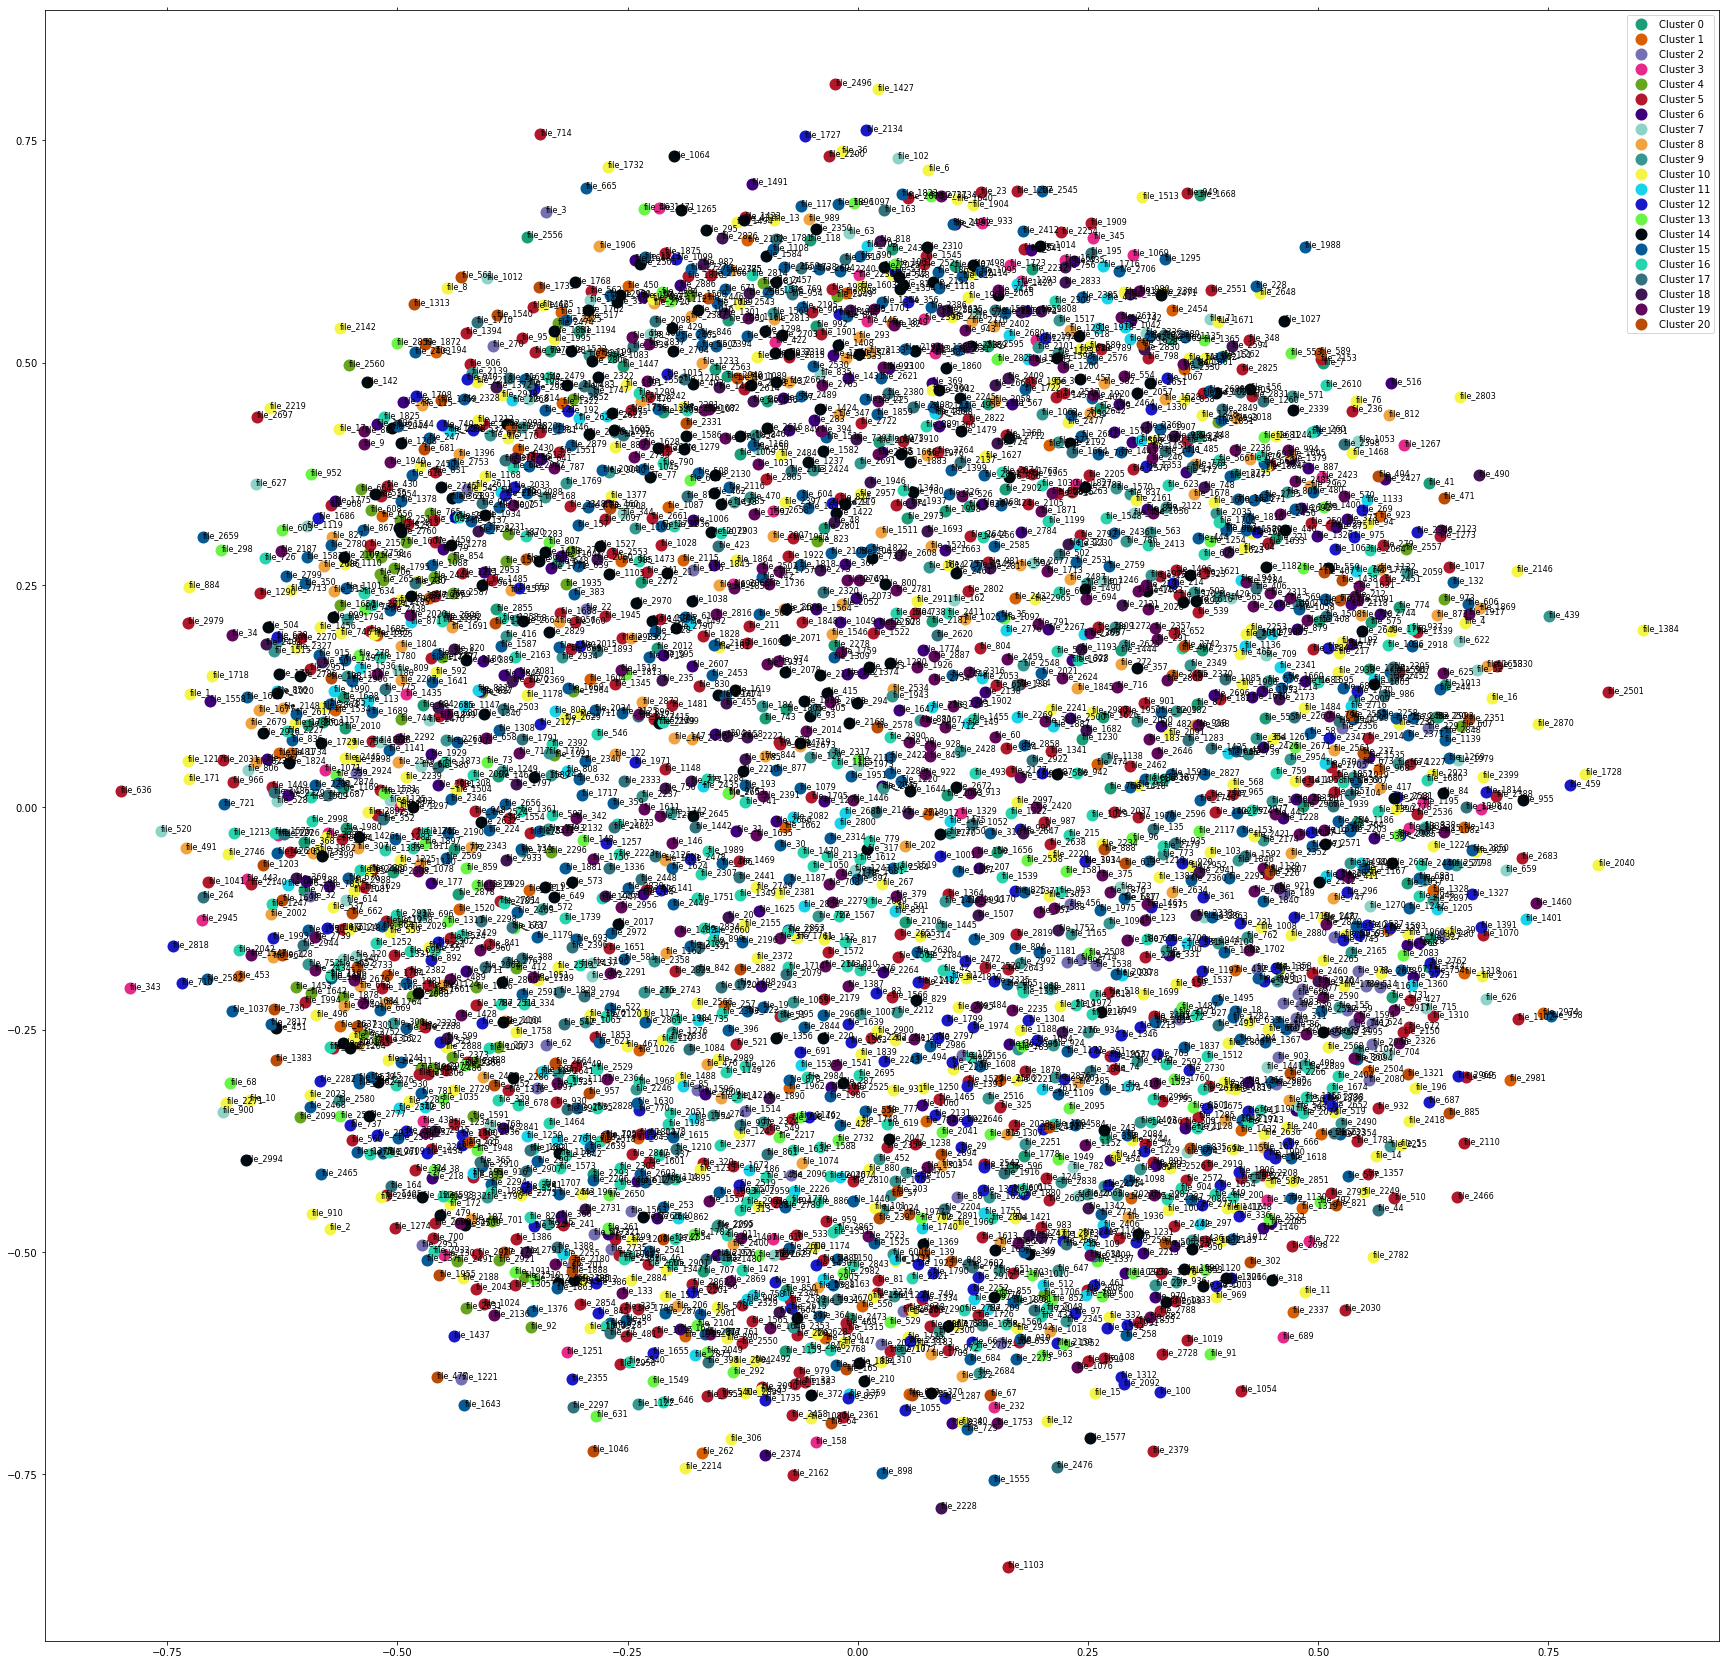

In [29]:
fig, ax = plt.subplots(figsize=(30, 30)) # size 지정하기
ax.margins(0.05) # 5% padding 추가하기

# iterate through groups to layer the plot
# name에는 cluster number가 group에는 데이터들이 저장
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

# legend 설정하기
ax.legend(numpoints=1)  #show legend with only 1 point

# (x, y)위치에 논문 title 텍스트 추가하기 
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

#show the plot
plt.show()

In [30]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [31]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

Hierarchical document clustering

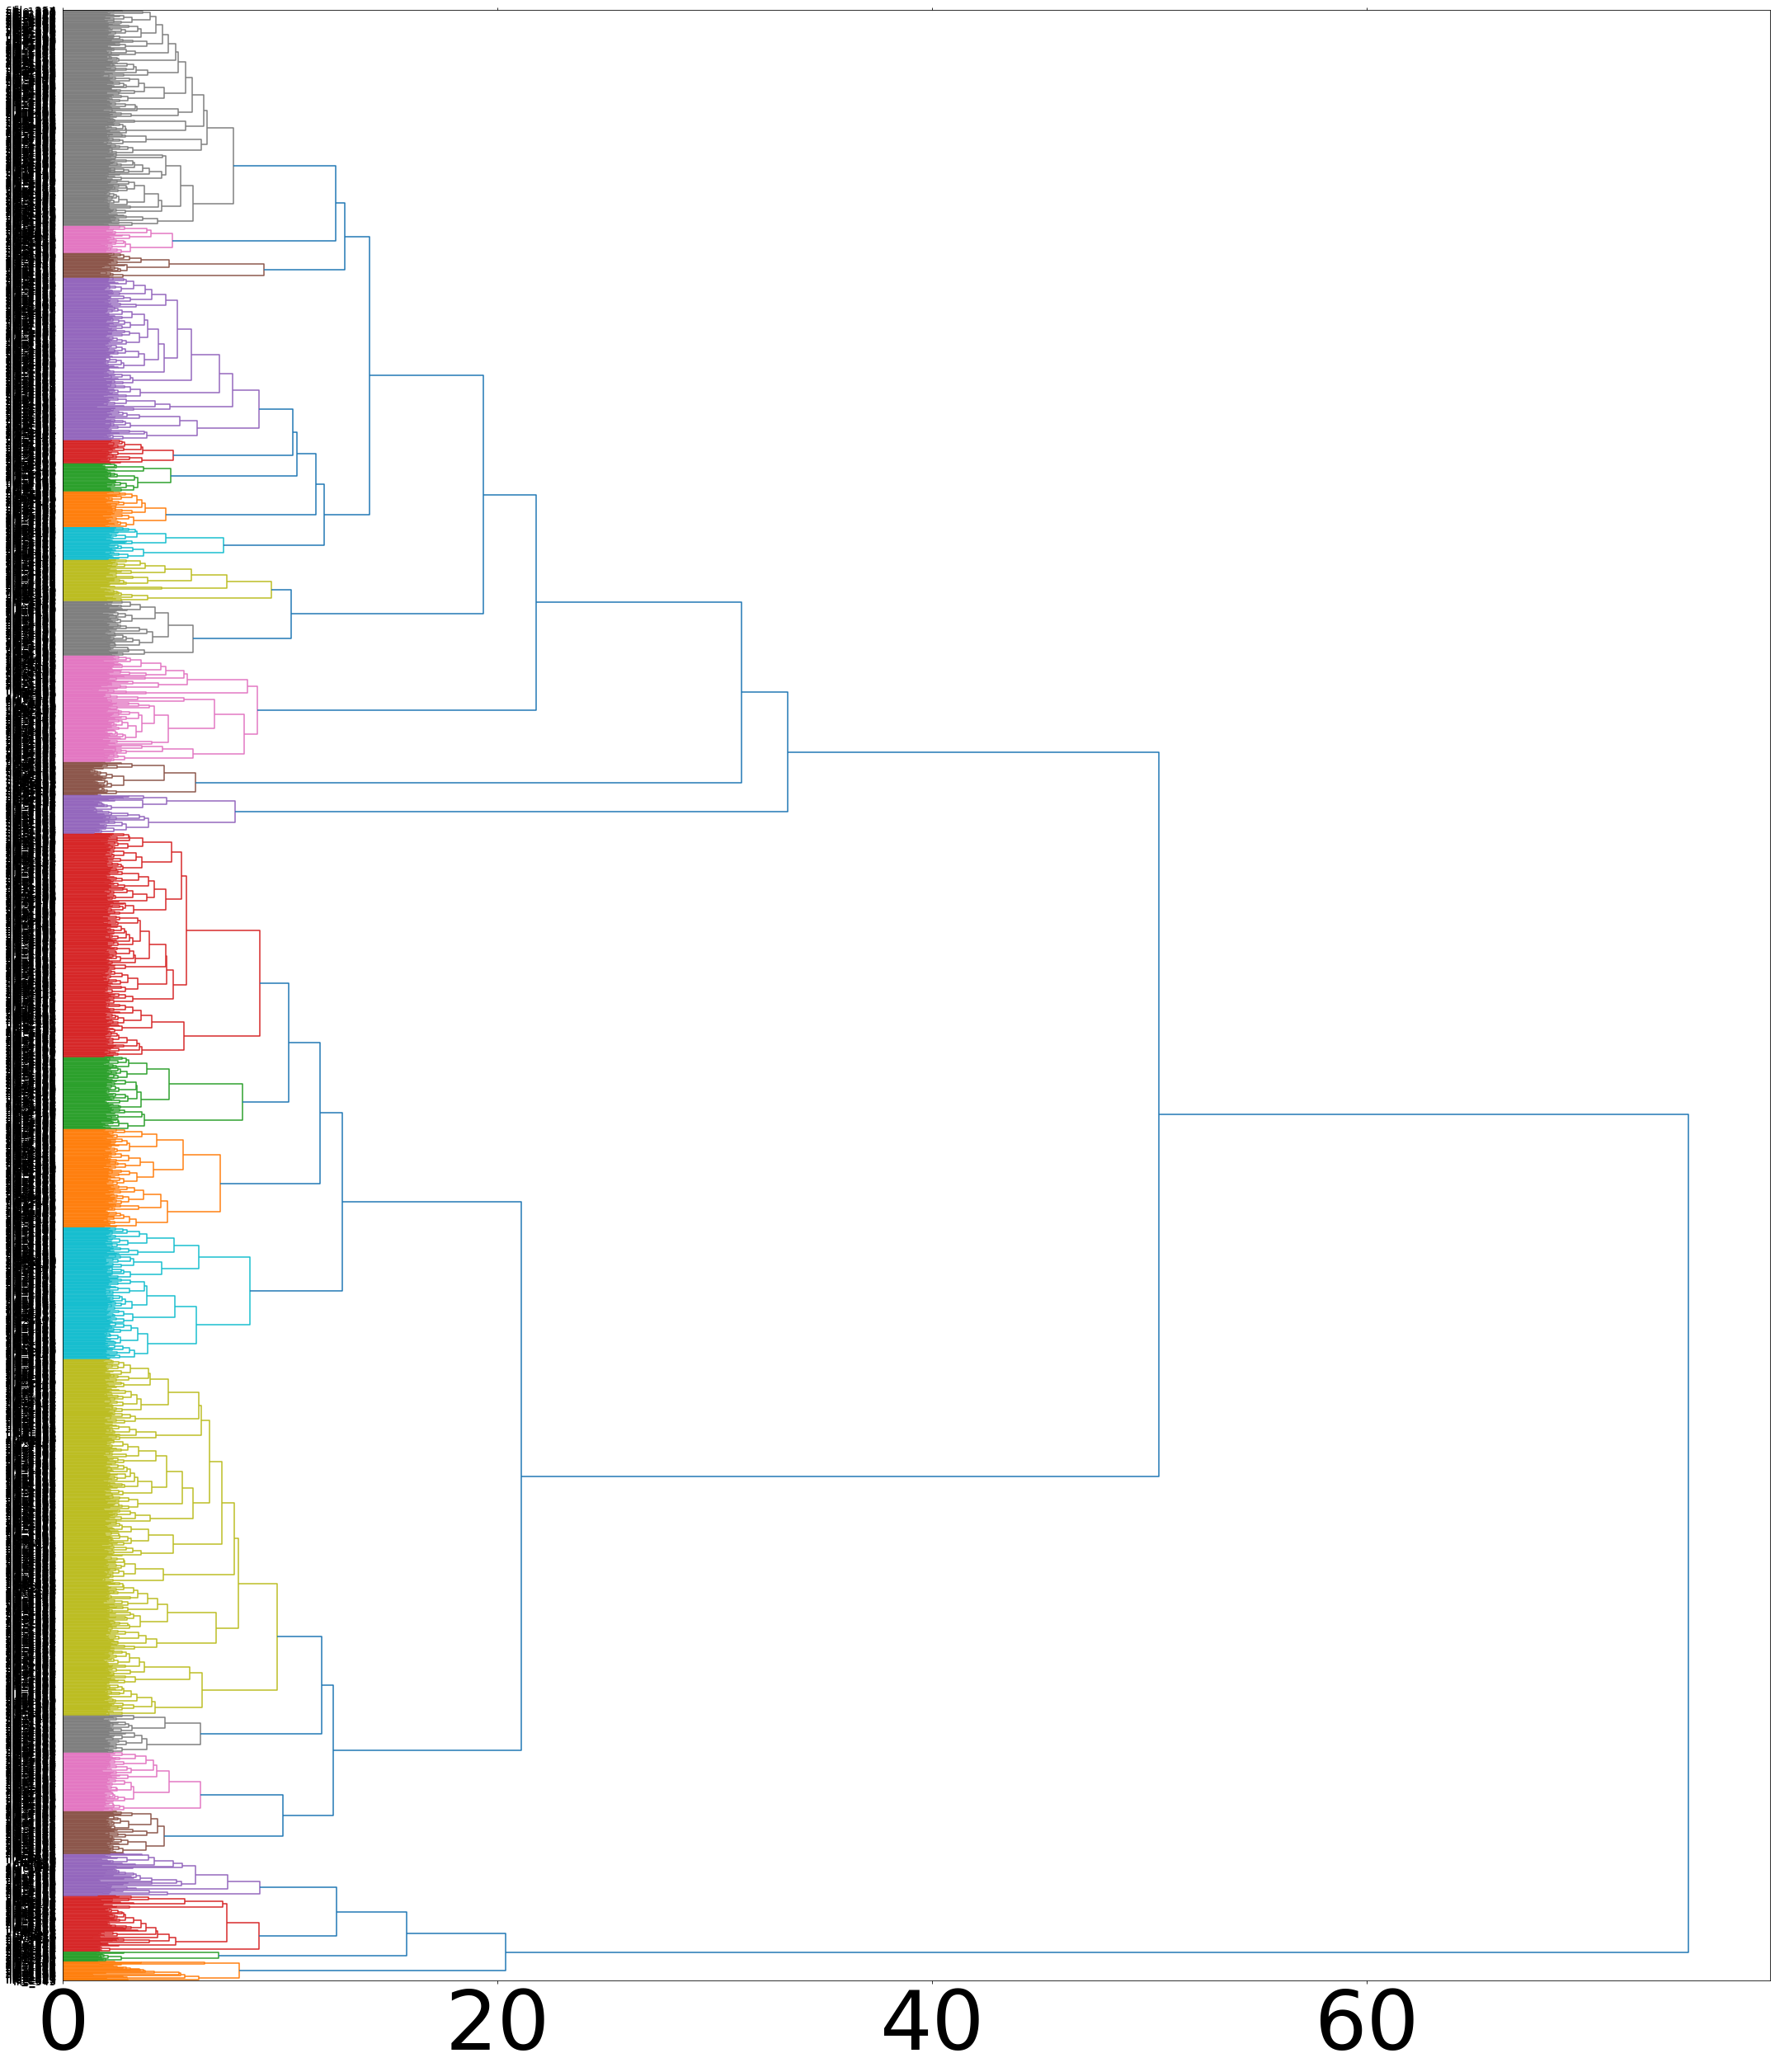

In [32]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(30, 35)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles, color_threshold=10, leaf_font_size = 13.5);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize = 100,
)

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters_QA.png', dpi=200) #save figure as ward_clusters

In [33]:
plt.close()

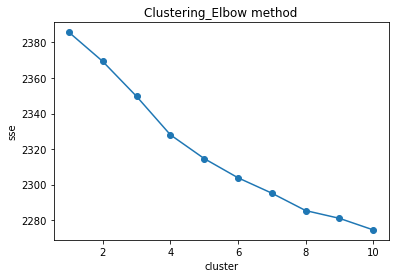

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()

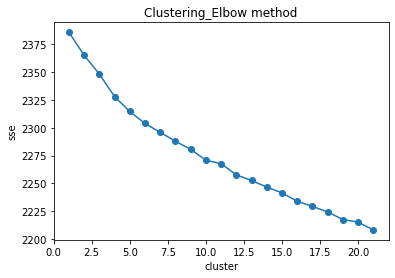

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,22):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,22), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()

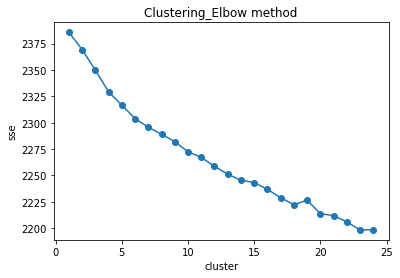

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,25):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,25), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()

# Latent Dirichlet Allocation

In [37]:
#텍스트 고유 한 이름 제거(문장에서 첫 단어를 잡아 당기는 것) 
import string
def strip_proppers(text):
    # 먼저 문장 단위로 토큰 화 한 다음 단어 단위로 토큰 화하여 구두점이 자체 토큰 
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [38]:
#실제 텍스트 처리 (고유 명사 제거, 토큰 화, 불용어 제거)를 실행

#텍스트에서 모든 명사 (NNP) 또는 복수 명사 (NNPS) strip 
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split())
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [39]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in synopses]

#tokenize
%time tokenized_text = [tokenize_and_lemmatize(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

Wall time: 7min 43s
Wall time: 6min 44s
Wall time: 1min 9s


In [40]:
# Gensim 특정 변환 극단적인 단어 필터링
# Gensim 사전 만들기
dictionary = corpora.Dictionary(texts)

#극단 값 제거 (tf-idf 행렬을 만들 때 사용되는 최소/최대 df 단계와 유사)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#사전을 참조 용 단어 모음으로 변환
corpus = [dictionary.doc2bow(text) for text in texts]

In [41]:
#LDA는 문서가 주제의 혼합이고 문서의 각 단어가 문서의 주제에 기인한다고 가정하는 확률 적 주제 모델
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

Wall time: 34min 26s


In [42]:
# 각 주제에는 특정 확률과 함께 정의하는 단어 세트
lda . show_topics ()

[(0,
  '0.004*"matrix" + 0.004*"token" + 0.003*"col" + 0.003*"std" + 0.003*"num" + 0.003*"mov" + 0.002*"fd" + 0.002*"ch" + 0.002*"eax" + 0.002*"z"'),
 (1,
  '0.004*"root" + 0.004*"num" + 0.003*"fd" + 0.003*"token" + 0.003*"pipe" + 0.003*"parent" + 0.003*"pid" + 0.003*"mov" + 0.002*"fork" + 0.002*"matrix"'),
 (2,
  '0.005*"socket" + 0.003*"client" + 0.003*"num" + 0.002*"ch" + 0.002*"ret" + 0.002*"fd" + 0.002*"mov" + 0.002*"port" + 0.002*"matrix" + 0.002*"root"'),
 (3,
  '0.004*"image" + 0.004*"num" + 0.003*"h" + 0.003*"height" + 0.002*"root" + 0.002*"width" + 0.002*"tmp" + 0.002*"matrix" + 0.002*"student" + 0.002*"client"'),
 (4,
  '0.009*"decimal" + 0.005*"floating" + 0.005*"linker" + 0.005*"precision" + 0.005*"std" + 0.005*"base" + 0.004*"fraction" + 0.003*"representation" + 0.003*"unit" + 0.003*"linkage"')]

In [43]:
# 주제를 각 주제의 상위 20개 단어 목록으로 변환
# k- means clustering 사용하여 확인한 것과 유사하게 주제 분류 확인 가능
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

["('matrix', 0.00395962)", "('token', 0.0035331594)", "('col', 0.0032509612)", "('std', 0.0032401136)", "('num', 0.0029478373)", "('mov', 0.002554913)", "('fd', 0.0024677336)", "('ch', 0.0023241618)", "('eax', 0.0022940387)", "('z', 0.0022618612)", "('tmp', 0.002228664)", "('ret', 0.002194749)", "('column', 0.0021303867)", "('rax', 0.002059562)", "('id', 0.0019362967)", "('q', 0.001835235)", "('counter', 0.001827225)", "('board', 0.0018199842)", "('val', 0.0017762686)", "('operand', 0.0016966861)"]

["('root', 0.0040233983)", "('num', 0.0036552325)", "('fd', 0.0034383044)", "('token', 0.003171018)", "('pipe', 0.0030242666)", "('parent', 0.0029139742)", "('pid', 0.0026629078)", "('mov', 0.00250532)", "('fork', 0.0023509543)", "('matrix', 0.0021905978)", "('ret', 0.002161963)", "('r0', 0.0021138415)", "('z', 0.0021079148)", "('tmp', 0.0019365513)", "('val', 0.0019052703)", "('q', 0.0017742878)", "('ch', 0.001720705)", "('gdb', 0.0016755784)", "('errno', 0.0016739969)", "('letter', 0.0016

<ipython-input-43-b2cd31620945>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  topics_matrix = np.array(topics_matrix)
